# **info**
1. The original code was sourced from [here](https://github.com/lucas-uw/WRF-tools/tree/master/WRF_input_tools "GitHub/lucas-uw").
2. Modifications were applied by [cansuduzgun](https://github.com/cansud98 "GitHub/cansud98") to enable plotting of domain setups for different WRF runs that utilize the same d01 configuration.

In [1]:
import numpy as np
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import WRFDomainLib

# main code

In [2]:
DEMFile = 'ETOPO1.0_1degree.nc'
WPSFile_MCS = 'namelist.wps.11June2012'
WPSFile_Sprcll = 'namelist.wps.29May2012'

In [3]:
DEMDs = xr.open_dataset(DEMFile)
dem = DEMDs['DEM'].values
dem_lat = DEMDs['lat'].values
dem_lon = DEMDs['lon'].values

dem_lons, dem_lats = np.meshgrid(dem_lon, dem_lat)

for i in np.arange(dem.shape[0]):
    for j in np.arange(dem.shape[1]):
        if dem[i,j]<0:
            dem[i,j]=0

In [4]:
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile_MCS)
wpsprojS, latlonprojS, corner_lat_fullS, corner_lon_fullS, length_xS, length_yS = WRFDomainLib.calc_wps_domain_info(WPSFile_Sprcll)

In [5]:
cmap = matplotlib.cm.terrain
vmin = 0
vmax = 3000

/Users/cansu/miniconda3/envs/project/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)


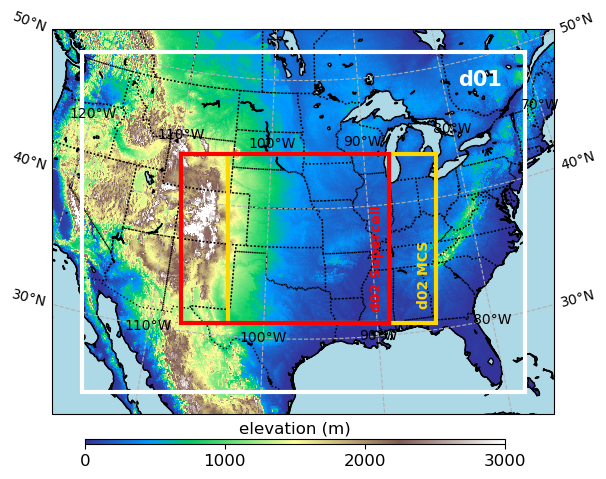

In [6]:
fig1 = plt.figure(figsize=(7,5))
ax1 = plt.subplot(1, 1, 1, projection=wpsproj)

ax1.pcolormesh(dem_lons, dem_lats, dem, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1, transform=ccrs.PlateCarree(), zorder=0)

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax1.add_patch(matplotlib.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], 
                                    fill=None, lw=3, edgecolor='white', zorder=2))
ax1.text(corner_x1[0]+length_x[0]*0.85, corner_y1[0]+length_y[0]*0.9, 'd01',
         fontweight='bold', size=15, color='white', zorder=2)

# d02 box MCS
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(matplotlib.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], 
                                    fill=None, lw=3, edgecolor='gold', zorder=2))
ax1.text(corner_x2[0]+length_x[1]*0.91, corner_y2[0]+length_y[1]*0.1, 'd02 MCS',
         fontweight='bold', size=10, color='gold', zorder=2, rotation='vertical')


# d02 box Sprcll
corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_fullS[1,:], corner_lat_fullS[1,:], wpsprojS, latlonprojS)
ax1.add_patch(matplotlib.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_xS[1], length_yS[1],
                                    fill=None, lw=3, edgecolor='red', zorder=2))
ax1.text(corner_x3[0]+length_xS[1]*0.91, corner_y3[0]+length_yS[1]*0.7, 'd02 Supercell', va='top', ha='left',
         fontweight='bold', size=10, color='red', zorder=2, rotation='vertical')


# decorations
ax1.coastlines('50m', linewidth=0.8)
ax1.add_feature(cartopy.feature.OCEAN, edgecolor='k', facecolor='lightblue', zorder=1)
ax1.add_feature(cartopy.feature.LAKES, edgecolor='k', facecolor='lightblue', zorder=1)
ax1.add_feature(cfeature.STATES, linestyle=':')



gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', alpha=1)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = True
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-49,10))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))

#ax1.set_title('WRF nested domain setup', size=16)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.01])
fig1.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
              cax=cbar_ax, ticks=np.arange(0, vmax+1, 1000), orientation='horizontal')
cbar_ax.tick_params(labelsize=12)
cbar_ax.text((vmin+vmax)/2, 5000, 'elevation (m)', ha='center', va='bottom', size=12)

#fig1.savefig('WRF_2010Nash_domain.png', dpi=600)

plt.show()
plt.close()

del(fig1)

In [7]:
wpsproj

<Derived Projected CRS: +proj=lcc +ellps=WGS84 +lon_0=-96.5 +lat_0=39.0 +x ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: Unknown based on WGS84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich